# Implementing spectroscopic systematics

## Galaxies in Boxes

If you have a galaxy mock in a box, you can implement the spectroscopic systematics on the peculiar velocities of model galaxies. 

1. We want to implement spectroscopic systematics of SDSS LRGs at z=0.9, so we use the code as follows:

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# generate a galaxy catalogue with 'peculiar velocity' in a 1Gpc/h box
np.random.seed(12345)
boxsize   = 1000
positions = np.random.uniform(0,boxsize,  (100000,3)) # X, Y, Z in Mpc/h
velocity  = np.random.normal(-1200,1200,100000) # Gaussian peculiar velocity 

# list the necessary information
redshift  = 0.9
size      = len(positions) # the length of the galaxy catalogue
source    = 'SDSS' # the source of the systemaitcs measurement
geometry  = 'box'  # the geometry of the galaxy mock
tracer    = 'LRG'  # the tracer type
output    = './Delta_v.txt' # the output name of the velocity

In [3]:
# generate the extra velocity component caused by spectroscopic systematics
os.system(f'python spectroscopic_sys_simple.py --redshift {redshift} --size {size} --source {source} --geometry {geometry} --tracer {tracer} --output {output}')

0

In [4]:
# implement the redshift uncertainty on the peculiar velocity
Delta_v   = np.loadtxt(output)
velocity_ = Delta_v

# compute the galaxy position in the redshift space (z-axis is the line-of-sight)
## assume LCDM without curvature for the galaxy mock
Omega_m   = 0.3175
Ode       = 1-Omega_m
H         = 100*np.sqrt(Omega_m*(1+redshift)**3+Ode)
## compute the z-axis positon in the redshift space
Z_RSD     = positions[:,-1]+ velocity_*(1+redshift)/H


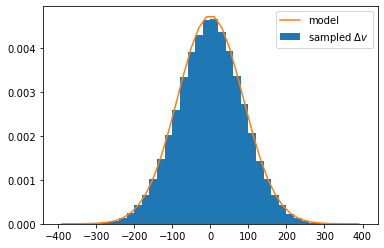

In [5]:
# compare the sampled Delta_v and the model of redshift uncertainty
_,bins,_  = plt.hist(Delta_v,label=r'sampled $\Delta v$',density=True,bins=np.linspace(-400,400,41))
mid       = (bins[1:]+bins[:-1])/2    
sigma     = 86.1
A         = 1/sigma/2.45
plt.plot(mid,A*np.exp(-mid**2/2/sigma**2),label='model')
plt.legend()

2. We want to generate DESI-ELG-like spectroscopic systematics at z=1.3. The implementation is as follows:

In [6]:
# list the necessary information
redshift  = 1.3
size      = len(positions) # the length of the galaxy catalogue
source    = 'DESI' # the source of the systemaitcs measurement
geometry  = 'box'  # the geometry of the galaxy mock
tracer    = 'ELG'  # the tracer type
output    = './Delta_v_ELG.txt' # the output name of the velocity

In [7]:
# generate the extra velocity component caused by spectroscopic systematics
os.system(f'python spectroscopic_sys_simple.py --redshift {redshift} --size {size} --source {source} --geometry {geometry} --tracer {tracer} --output {output}')

0

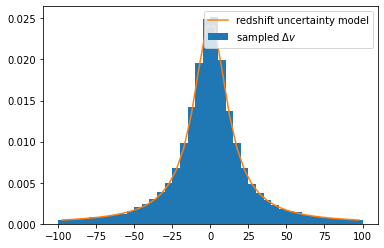

In [8]:
# compare the sampled Delta_v and the model of redshift uncertainty
Delta_v   = np.loadtxt(output)
_,bins,_  = plt.hist(Delta_v[abs(Delta_v)<1000],label=r'sampled $\Delta v$',density=True,bins=np.linspace(-100,100,41))
mid       = (bins[1:]+bins[:-1])/2    
sigma     = 13.4
A         = 1/sigma/3
plt.plot(mid,A/(1+mid**2/sigma**2),label='redshift uncertainty model')
plt.legend()

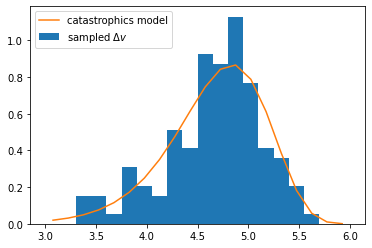

In [9]:
# compare the sampled Delta_v and the model of catastrophics
_,bins,_  = plt.hist(np.log10(abs(Delta_v[abs(Delta_v)>1000])),label=r'sampled $\Delta v$',density=True,bins=np.linspace(3,6,21))
mid       = (bins[1:]+bins[:-1])/2    
sigma     = 0.25
bias      = 0.64
shift     = 6.62
A         = 1/np.sqrt(2*np.pi)/sigma
plt.plot(mid, A/(-mid+shift)*np.exp(-(np.log((-mid+shift))-bias)**2/(2*sigma**2)),label='catastrophics model')
plt.legend()

3. We want to generate DESI-QSO-like spectroscopic systematics at z=1.8. Note that the values are from its clustering effect, including statistical redshift uncertainty and velocity shift. The implementation is as follows:

In [10]:
# list the necessary information
redshift  = 1.8
size      = len(positions) # the length of the galaxy catalogue
source    = 'DESI' # the source of the systemaitcs measurement
geometry  = 'box'  # the geometry of the galaxy mock
tracer    = 'QSO'  # the tracer type
output    = './Delta_v_QSO.txt' # the output name of the velocity

In [11]:
# generate the extra velocity component caused by spectroscopic systematics
os.system(f'python spectroscopic_sys_simple.py --redshift {redshift} --size {size} --source {source} --geometry {geometry} --tracer {tracer} --output {output}')

0

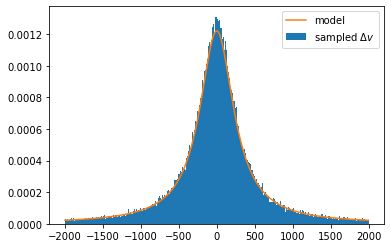

In [12]:
# compare the sampled Delta_v and the model of redshift uncertainty
Delta_v   = np.loadtxt(output)
_,bins,_  = plt.hist(Delta_v,label=r'sampled $\Delta v$',density=True,bins=np.linspace(-2000,2000,401))
mid       = (bins[1:]+bins[:-1])/2    
sigma     = 273
A         = 1/sigma/3
plt.plot(mid,A/(1+mid**2/sigma**2),label='model')
plt.legend()